#### Customer Segmentation

#### Overview
This Python script performs customer segmentation using various clustering algorithms on a dataset containing customer information. Customer segmentation is a common technique used by businesses to divide their customer base into groups with similar characteristics. By doing so, businesses can tailor their marketing strategies and services to better meet the needs of each segment.

#### Problem Description
The problem addressed in this script is that of customer segmentation based on annual income and spending score. The objective is to cluster customers into distinct groups, allowing businesses to gain insights into their diverse customer base and make data-driven decisions. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as clus

In [4]:
# Load the dataset
dataset = pd.read_csv('dataset.csv')

In [5]:
# Display dataset information
print("Dataset Shape:", dataset.shape)
print("\nDataset Description:\n", dataset.describe())
print("\nFirst 5 Rows of the Dataset:\n", dataset.head(5))

Dataset Shape: (303, 2)

Dataset Description:
            INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000

First 5 Rows of the Dataset:
    INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163


In [11]:
# Separating features for clustering
features = dataset[['INCOME', 'SPEND']]

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

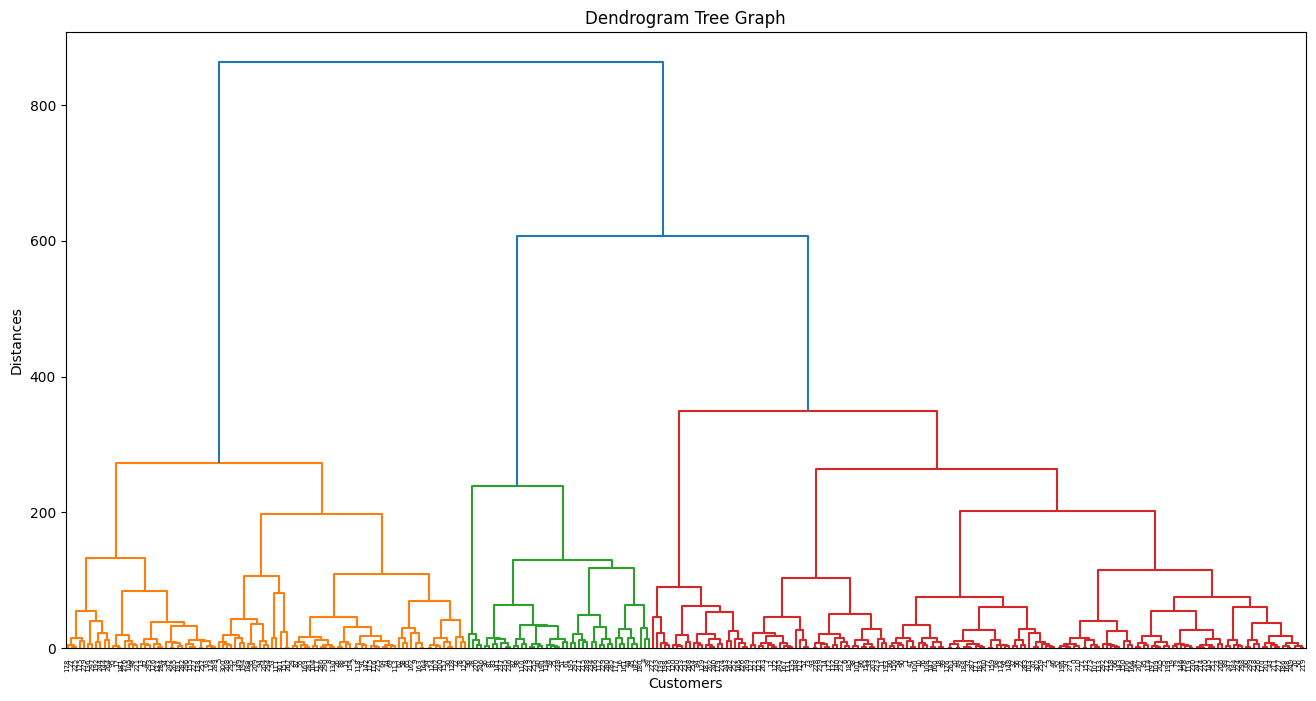

In [13]:
# Visualize Dendrogram Tree Graph
plt.figure(figsize=(16, 8))
dendrogram = clus.dendrogram(clus.linkage(dataset, method='ward'))
plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

Silhouette Score for Hierarchical Clustering: 0.11962426089434389
Silhouette Score for KMeans Clustering: 0.3487799322527609
Silhouette Score for DBSCAN Clustering: 0.45733098309920917
Silhouette Score for Birch Clustering: 0.3267414232270779


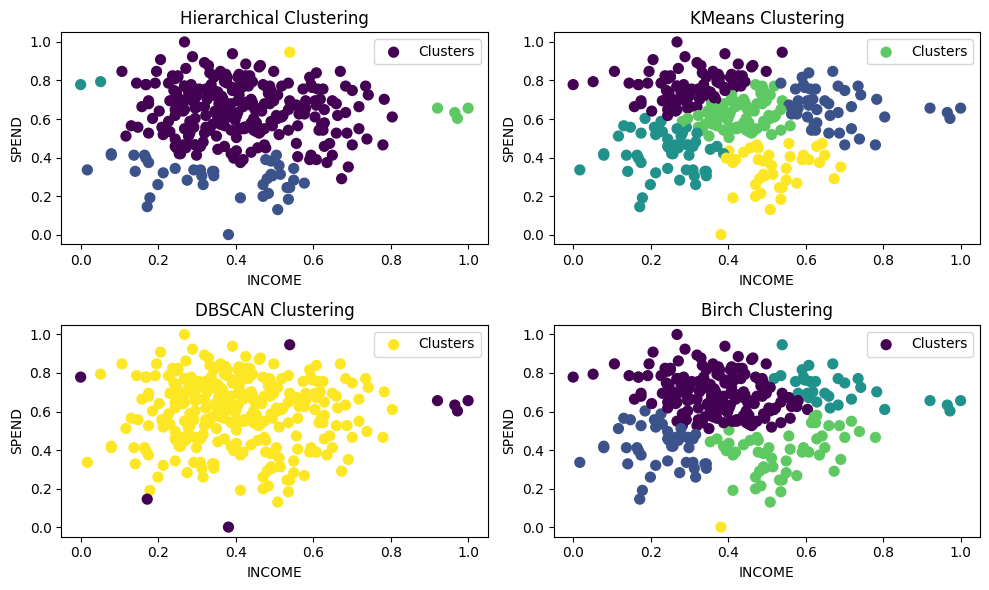

In [15]:
# Visualize Clusters
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Hierarchical Clustering Model
hierarchical_model = AgglomerativeClustering(n_clusters=5, linkage='average')
y_hierarchical = hierarchical_model.fit_predict(scaled_features)
axes[0, 0].scatter(scaled_features[:, 0], scaled_features[:, 1], s=50, c=y_hierarchical, cmap='viridis', label='Clusters')
axes[0, 0].set_title('Hierarchical Clustering')
silhouette_hierarchical = silhouette_score(scaled_features, y_hierarchical)
print("Silhouette Score for Hierarchical Clustering:", silhouette_hierarchical)

# KMeans Clustering Model
kmeans_model = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans_model.fit_predict(scaled_features)
axes[0, 1].scatter(scaled_features[:, 0], scaled_features[:, 1], s=50, c=y_kmeans, cmap='viridis', label='Clusters')
axes[0, 1].set_title('KMeans Clustering')
silhouette_kmeans = silhouette_score(scaled_features, y_kmeans)
print("Silhouette Score for KMeans Clustering:", silhouette_kmeans)

# DBSCAN Clustering Model
dbscan_model = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan_model.fit_predict(scaled_features)
axes[1, 0].scatter(scaled_features[:, 0], scaled_features[:, 1], s=50, c=y_dbscan, cmap='viridis', label='Clusters')
axes[1, 0].set_title('DBSCAN Clustering')
silhouette_dbscan = silhouette_score(scaled_features, y_dbscan)
print("Silhouette Score for DBSCAN Clustering:", silhouette_dbscan)

# Birch Clustering Model
birch_model = Birch(threshold=0.1, n_clusters=5)
y_birch = birch_model.fit_predict(scaled_features)
axes[1, 1].scatter(scaled_features[:, 0], scaled_features[:, 1], s=50, c=y_birch, cmap='viridis', label='Clusters')
axes[1, 1].set_title('Birch Clustering')
silhouette_birch = silhouette_score(scaled_features, y_birch)
print("Silhouette Score for Birch Clustering:", silhouette_birch)

# Set common labels
for ax in axes.flat:
    ax.set_xlabel('INCOME')
    ax.set_ylabel('SPEND')
    ax.legend()

plt.tight_layout()
plt.show()